# <center/>هوش مصنوعی<center>

## <center/>پروژه سوم - طبفه بند بیزی<center>
### <center/>دکتر فدایی - دکتر مرادی<center>
### <center/>محیا قینی -810196615 <center>
###### <center/>آبان 1399 <center>

## <div style="direction:rtl">هدف پروژه</div> 
<div style="direction:rtl">یکی از مسائل مهم و پرکاربرد در حوزه هوش مصنوعی مسائل دسته بندی و طبقه بندی داده هاست. در این پروژه میخواهیم داده ها را به کمک مدل بیز دسته بندی کنیم. علاوه بر پیاده سازی این مدل عوامل تاثیرگذار بر آن را هم بررسی خواهیم کرد. در نهایت دسته بندی خود را با معیار های گوناگونی می سنجیم. </div> 

## <div style="direction:rtl">صورت مسئله</div>
<div style="direction:rtl">به ما مجموعه ای داده که برگرفته از سایت دیجیکالا است؛ داده شده است. حال از ما خواسته شده است با کمک دسته بند بیزی و داده هایی که داریم؛ مجموعه دیگری از داده ها را دسته بندی کنیم. در اصل مسئله دو فاز دارد یکی تجزیه و تحلیل داده ها و دیگری تشخیص نظر کاربر با توجه به تحلیل های مرحله قبل.</div>

## <div style="direction:rtl">کتابخانه های استفاده شده در حل مسئله</div>
<div style="direction:rtl">همانطور که می دانیم در پایتون کتابخانه های کاربردی و زیادی برای راحت تر شدن تحلیل ها و کار با داده ها وجود دارد. برای این مسئله از کتابخانه های زیر استفاده شده است:<br>- کتابخانه hazm:<br>
 این کتابخانه برای پردازش متن در پایتون است و عملاً معادل کتابخانه NLTK در پایتون اما برای زبان فارسی است.<br>
- کتابخانه pandas: <br>
 این کتابخانه به جهت کار و مدیریت دیتافریم ها نیاز است.<br>
- کتابخانه sys و codec:<br>
    این دو کتابخانه برای خواندن فایل تکست لغات تکراری که کاراکتر های فارسی دارند لازم است.<br>
- کتابخانه random:<br>
    این کتابخانه برای ایجاد عدد رندوم و تصمیم دسته بندی در آینده نیاز است.<br>
</div>

In [1]:
from hazm import *
import pandas as pd
# import numpy as np
import sys, codecs
# import math
import random
import matplotlib.pyplot as mplot

## <div style="direction:rtl">دیتای داده شده<div/>
<div style="direction:rtl">دو دسته داده به ما داده شده است.در ادامه این دو دسته را میبینیم:<br>
    1) داده جهت train:<br> 
    این دسته از داده شامل 6000 سطر و سه ستون تیتر، نظر، پیشنهاد یا عدم پیشنهاد توسط فرد نویسنده نظر است. در کل از این مجموعه داده به جهت تحلیل و ایجاد احتمالات برای تصمیم گیری در آینده استفاده خوایم کرد.<br>
    <div/>

In [2]:
#Get Train Data
trainData = pd.read_csv("comment_train.csv")
trainData

,title,comment,recommend
0,زیبا اما کم دوام,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
1,بسیار عالی,بسیار عالی,recommended
2,سلام,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,به درد نمیخورهههه,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,کلمن آب,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended
...,...,...,...
5995,جنسش عالیه,خیلی جنس پارچش نرم ولطیفه خیلیم جنسش خوبه اما ...,recommended
5996,خرید محصول,سلام.واقعا فکر نمی کردم به این راحتی اصلاح کنم...,recommended
5997,تعریف,من از دیجی کالا خریدم خیلی زود دستم رسید،زیبا،...,recommended
5998,اصلا چای ماچا نیسش,یا شرکت نمیدونسته چای ماچا امپریال چیه یا واقع...,not_recommended


<div style="direction:rtl">
2) داده جهت test:<br>
    این دسته از داده شامل 800 سطر و سه ستون تیتر، نظر، پیشنهاد یا عدم پیشنهاد توسط فرد نویسنده نظر است. در کل از این مجموعه داده به جهت تست دسته بندی که در آینده طراحی خواهیم کرد به کار خواهد رفت.<br>
    </div>

In [3]:
#Get Test Data
testData = pd.read_csv("comment_test.csv")
testData

,title,comment,recommend
0,وری گود,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,پنکه گوشی,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,دستگاه خیلی ضعیف,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,عالی و بیست,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended
...,...,...,...
795,بسیار کوچیک,طراحیش قشنگه ولی داخل عکس خیلی بزرگتر ب چشم م...,not_recommended
796,لامپ چینی,این لامپ چینی هستتش کیفیت پایین . نور کم و فاق...,not_recommended
797,خوب بود,در کل از این خریدم راضی هستم و به تناسب قیمتش ...,recommended
798,کیفیت خوبی داره,تازع نصبش کردم-سرعت انتقال و نصب بازی روش عالی...,recommended


<div style="direction:rtl">
نصف داده های تست در اصل در دسته recommended و نصف آنها در دسته not_recommended هستند.
    </div>

In [4]:
totalRecommended = sum(testData["recommend"] == "recommended")
totalRecommended

400

In [5]:
#PART 1; Preprocessing

## <div style="direction:rtl">فاز اول: پیش پردازش داده<div/>
<div style="direction:rtl">
    پیش پردازش داده از مراحل مهم برای شروع مسائل هوش مصنوعی است. در واقع با کمک پیش پردازش داده خامی که به ما داده اند را به شکل مناسبی برای استفاده در مدل تبدیل می کنیم. اهمیت پیش پردازش در آن است که کیفیت پیش پردازش در دقت و سرعت طبقه بندی تاثیر زیادی دارد. ما در اینجا از کتابخانه هضم برای پیش پردازش کمک میگیریم. در ادامه تعدادی از راهها و عملیاتی که می تواند به ایجاد داده ای مناسب در مدل کمک کند را بررسی می کنیم.  
    </div>

In [6]:
resultToCheck = []
resultToCheckAS = []

#### <div style="direction:rtl">حذف رشته های پر تکرار(stop words)<div/>
<div style="direction:rtl">
    اهمیت این مرحله از آن جهت است که نمیخواهیم در داده هایمان کلمات پرتکراری(به، با، ...) باشند که احتمال رخ دادنشان در هر دو دسته زیاد باشد و عملاً در تصمیم گیری کمکی نمیکنند و تنها حافظه اشغال می کنند و زمان اجرا وتحلیل داده ها را زیاد می کنند.<br>
    ما در اینجا در یک فایل تکست(ignore.txt) که لیستی از این لغات پرتکرار را دارد کمک میگیریم. این لیست با کمک فایل لغات پرتکرار کتابخانه هضم تولید شده است. البته لغاتی مانند خوب، عالی و ... که در تصمیم گیری این مسئله خاص تاثیر گذار است را حذف کردم و تعدادی کاراکتر مانند ویرگول، علامت سوال و ... را اضافه کردم.<br>
    همانطور که در توضیح کتابخانه ها بالاتر توضیح داده شده است، از آنجا که فایل تکست رشته های فارسی داشتند خواندن عادی آن مناسب نبود. بنابراین با codec و encoding = utf8 فایل را می خوانیم سپس یک لیست از روی داده ها می سازیم. 
    </div>

In [7]:
#Get should ignore tokens
with codecs.open("ignore.txt", encoding='utf8') as stopwords_file:
    ignore = list(set(map(lambda w: w.strip(), stopwords_file)))

<div style="direction:rtl">
   حال به بررسی و توضیح تعدادی دیگر از توابع که کتابخانه هضم جهت پیش پردازش معرفی می کند می پردازیم: 
    </div>

In [8]:
#Needed classes from Hazm
normalizer = Normalizer()
stemmer = Stemmer()
lemmatizer = Lemmatizer()

#### <div style="direction:rtl">تبدیل فاصله در یک کلمه به نیم فاصله(normalize)<div/>
<div style="direction:rtl"> اهمیت این مرحله از آن جهت است که در مراحل آینده رشته ای که نیم فاصله داشته باشد یک رشته واحد به حساب می آید. مثال زیر را در نظر گیرید:</div>

In [9]:
normalizer.normalize("نمی خواستم")

'نمی\u200cخواستم'

<div style="direction:rtl">الان کلمه نمی‌خواستم کلمه ای واحد شمرده می شود و اگر برای مثال "نمی" در لیست لغات پرتکرار باشد از این فعل حذف نمی شود و جزو فعل شمرده می شود.</div> 

<div style="direction:rtl">توضیح دو مورد باقی مانده را در قالب پاسخ به پرسش اول صورت پروژه می دهم:<br>
<b>
1)  &ensp; جایگزین کردن کلمات با روش stemming یا lemmatization را توضیح دهید و تاثیر آن را تحلیل کنید. 
    </b>
</div> 

#### <div style="direction:rtl"> ریشه یابی لغات(lemmatizer)</div>
<div style="direction:rtl">اهمیت این مرحله از این جهت است که از تکرار ها بی مورد در داده ها جلوگیری می کند و داده هایی که در ریشه  یکسان هستند را هم شکل می کند تا از مصرف بیش از حد حافظه جلوگیری شود.</br> 
در این مسئله خاص ترجیح من عدم استفاده از این تابع است. از آنجا که این تابع کلماتی که در ظاهر ریشه یکسانی دارند اما در معنا بسیار متفاوتند را هم یکسان می کند. در این مسئله برای مثال نظری که گفته شده " من این محصول را <b> نمی خواستم</b>" بسیار متفاوت است با نظری که گفته شده " من این محصول را <b> می خواستم</b>". اما در نهایت هردو خواه و خواست در نظر گرفته می شوند مانند مثال پایین: 
</div> 

In [10]:
lemmatizer.lemmatize("نمی‌خواستم")

'خواست#خواه'

In [11]:
lemmatizer.lemmatize("می‌خواستم")

'خواست#خواه'

#### <div style="direction:rtl"> ریشه یابی لغات به معنای واحد(stemming)</div>
<div style="direction:rtl">اهمیت این مرحله از این جهت است که شکست ها و شکل های مختلف یک کلمه را به یک شکل در می آورد. تا حد خوبی مانند تابع قبل است با این تفاوت که به لغات مفهوم می بخشد تا لغات با معنای یکسان به شکل یک کلمه ثبت شوند. بنابراین این هم از تکرار ها بی مورد در داده ها جلوگیری می کند و داده هایی که در معنا و مفهوم یکسان هستند را هم شکل می کند تا از مصرف بیش از حد حافظه جلوگیری شود. </br> 
در این مسئله خاص ترجیح من عدم استفاده از این تابع است. از آنجا که این تابع کلماتی که در ظاهر معنا و یک جنس یکسانی دارند اما در تاثیر در مفهوم جمله بسیار متفاوتند را هم یکسان می کند. در این مسئله برای مثال نظری که گفته شده "این محصول <b>بهترین</b> است" بسیار متفاوت است با نظری که گفته شده "<b> بهتر</b> از این محصول در بازار موجود است". اما در نهایت هردو به در نظر گرفته می شوند مانند مثال پایین: 
</div>

In [12]:
stemmer.stem("بهترین")

'به'

In [13]:
stemmer.stem("بهتر")

'به'

<div style="direction:rtl">
    قبل از ادامه بایستی اشاره شود در کتابخانه هضم دو تابع ذکر شده در بالا نام هایی جابه جا براساس عملگرشان و کتابخانه اصلی پایتون یعنی NLTK دارند.
</div>

#### <div style="direction:rtl"> توکن بندی(word_tokenize)</div>
<div style="direction:rtl">
   این قسمت در اصل نیاز مدل کردن داده هاست و پیش پردازش به حساب نمی آیدو در این مرحله رشته های بلند را به توکن و قسمت های کوچکتر تقسیم می کنیم تا در ادامه احتمال و عملیات روی آنها انجام شود.
</div>

<div style="direction:rtl">
   بنابراین طبق توضیحات برای پیش پردازش به ازای هر سطر ورودی رشته را normalize می کنیم سپس توکن بندی می کنیم. و بعد توکن هایی که در کلمات پرتکرار نیستند را به عنوان داده پردازش شده تولید می کنیم.
</div>

In [14]:
#Preprocessing
def preprocess(column):
    result = []
    for string in column:
        string = normalizer.normalize(string)
        for token in word_tokenize(string):
            if token not in ignore:
#                 token = stemmer.stem(token)
#                 token = lemmatizer.lemmatize(token)
                result.append(token)
    return result

<div style="direction:rtl">
  برای راحتی کار داده های train را براساس کلاسشان جدا کردیم و هر ستون را جدا پردازش و در لیستی جداگانه برای مراحل بعد ذخیره کردیم.
</div>

In [15]:
#Group Train Data
grouped = trainData.groupby("recommend")
recomTrainData = grouped.get_group("recommended")
recomTrainData.head()

,title,comment,recommend
1,بسیار عالی,بسیار عالی,recommended
7,قیمت بالا,خوب و تاثیر گذار اما با قیمت جدید سخته خریدش ه...,recommended
9,جای دستمال کاغذی,بسیار زیبا و دارای کارایی مناسب,recommended
10,بسیار با کیفیت و لنز عالی,دوربین واقعا با این قیمت ارزش خرید دارد \r\nعک...,recommended
11,مهدی,در کل نسبت به قیمت عالیه\r\nاگه فقط بخاطر نت م...,recommended


In [16]:
notRecomTrainData = grouped.get_group("not_recommended")
notRecomTrainData.head()

,title,comment,recommend
0,زیبا اما کم دوام,با وجود سابقه خوبی که از برند ایرانی نهرین سرا...,not_recommended
2,سلام,من الان ۳ هفته هست استفاده میکنم\r\nبرای کسایی...,not_recommended
3,به درد نمیخورهههه,عمرش کمه تا یه هفته بیشتر نمیشه استفاده کرد یا...,not_recommended
4,کلمن آب,فکر کنین کلمن بخرین با ذوق. کلی پولشو بدین. به...,not_recommended
5,سه شخصیت لگو,کالا هایی که اورده شد از نظر شکل هیچ شباهتی به...,not_recommended


In [17]:
#Title/Recom/Train
processTiReTr = preprocess(recomTrainData["title"])
processTiReTr[0:5]

['بسیار', 'عالی', 'قیمت', 'بالا', 'دستمال']

In [18]:
#Comment/Recom/Train
processCoReTr = preprocess(recomTrainData["comment"])
processCoReTr[0:5]

['بسیار', 'عالی', 'خوب', 'تاثیر', 'گذار']

In [19]:
#Title/NotRecom/Train
processTiNoTr = preprocess(notRecomTrainData["title"])
processTiNoTr[0:5]

['زیبا', 'کم', 'دوام', 'سلام', 'درد']

In [20]:
#Comment/NotRecom/Train
processCoNoTr = preprocess(notRecomTrainData["comment"])
processCoNoTr[0:5]

['سابقه', 'خوبی', 'برند', 'ایرانی', 'نهرین']

<div style="direction:rtl">
 داده های test را از جهت حفظ ترتیب و پیوستگی داده ها درجداگانه و به ترتیب پردازش و در جای خودشان در لیست داده ها ذخیره کردیم. 
</div>

In [21]:
#Title/Test
testTitles = testData["title"]
size = testData.shape[0]
for i in range(size):
    tokenizedTitle = []
    string = normalizer.normalize(testTitles[i])
    for token in word_tokenize(string):
        if token not in ignore:
#             token = stemmer.stem(token)
#             token = lemmatizer.lemmatize(token)
            tokenizedTitle.append(token)
    testTitles[i] = tokenizedTitle
testData.head()

,title,comment,recommend
0,"[وری, گود]",تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,"[مناسب, رنگ, میده, یه, وقتایی, موقع, نوشتن]",با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,"[پنکه, گوشی]",خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,"[دستگاه, خیلی, ضعیف]",من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,"[عالی, بیست]",بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended


In [22]:
testComments = testData["comment"]
for i in range(size):
    tokenizedComment = []
    string = normalizer.normalize(testComments[i])
    for token in word_tokenize(string):
        if token not in ignore:
#             token = stemmer.stem(token)
#             token = lemmatizer.lemmatize(token)
            tokenizedComment.append(token)
    testComments[i] = tokenizedComment
testData.head()

,title,comment,recommend
0,"[وری, گود]","[تازه, خریدم, یه, کار, بکنه, میشه, کیفیت, قطعاتش]",recommended
1,"[مناسب, رنگ, میده, یه, وقتایی, موقع, نوشتن]","[قیمت, گزینه‌های, بهتری, میشه, روان, مینویسه, ...",not_recommended
2,"[پنکه, گوشی]","[خیلی, عالیه, کاش, اون, سمتش, میشد, پاوربانک, ...",recommended
3,"[دستگاه, خیلی, ضعیف]","[فیس, براس, روز, یپش, دستم, الان, روز, استفاده...",not_recommended
4,"[عالی, بیست]","[بنده, یه, هارد, اکسترنال, دارم, کابل, فابریکش...",recommended


<div style="direction:rtl">
 قبل از ورود به قسمت قبل باید ذکر شود جهت تصمیم گیری بهتر در راستای انتخاب مراحل پیش پردازش با حالات مختلف مراحل بعدی که در ادامه ذکرمی شود را تست کردم.نتایج این بررسی ها در ادامه و جای مناسب بیان می شوند. 
</div>

In [23]:
#Part 2; Naive Bayes/ Bag of Words

## <div style="direction:rtl">فاز دوم: فرآیند مسئله <div/>
<div style="direction:rtl">
    در این مسئله می خواهیم با کمک Naive Bayes و مدل bag of words داده های تست را در دو کلاس دسته بندی کنیم. دیدگاه مدل bag of words این است که کلمات مستقل از جایگاهشان در عبارت بررسی می شود و صرفاً تعداد آن کلمه در هر کلاس برای تصمیم گیری مهم است. همچنین برای هر کلمه naive bayes به شکل زیر تعریف می شود. 
    </div>

$$
P(c|x) = \frac{P(x|c)\times P(c)}{P(x)}
$$

<div style="direction:rtl">
<b>
2)  &ensp; توضیح دهید که هر کدام از مفاهیم احتمالی ذکر شده در رابطه بالا بیانگر چه مفهومی در این مسئله هستند و چگونه محاسبه می شوند. 
    </b><br><br>
    -$P(c|x)$ 
این مورد با نام posterior تعریف شده است. که درواقع بیانگره احتمال رخ دادن کلاس c به شرط وجود یک x که در اینجا یک عبارت خاص است. با کمک فرمول داده شده این عبارت محاسبه می شود. <br>در این مساله احتمال کلاس recommended به شرط عبارت x و همچنین برای not recommended است.<br><br>
    -$P(x|c)$ 
این مورد با نام likelihood تعریف شده است. که در واقع بیانگره احتمال رخ دادن X به شرط وجود کلاس C است. <br> در اینجا مفهوم احتمال هر کلمه به شرط اینکه کلاس recommended (not recommended) باشد. برای محاسبه این عبارت کافی است تکرار هر کلمه یکبار در داده های recommended و یکبار در داده های not recommended محاسبه شود و سپس تقسیم بر تعداد کل کلمات آن کلاس شود.<br><br>
    -$P(c)$
این مورد با نام prior تعریف شده است که در واقع احتمال رخ دادن کلاس c است.<br> در اینجا به مفهوم احتمال اینکه نظر در جهت recommended باشد یا در جهت not recommended باشد؛ است. برای محاسبه آن کافی است تعداد کل نظرات recommended بر تعداد کل داده های train تقسیم شود و برای not recommended هم تعداد کل نظرات not recommended بر تعداد کل داده های train تقسیم شود.<br> <br<
    -$P(x)$
    این مورد با نام evidence تعریف شده است. که در واقع احتمال رخ دادن x در کل است.<br> در اینجا به معنای احتمال رخ دادن کلمه ای خاص در تمام داده های train است. برای محاسبه آن باید تعداد رخداد های هر کلمه را بر تعداد کل کلمات داده های train (تیتر و نظر)تقسیم کنیم.
</div>

<div style="direction:rtl">
   عبارت بالا احتمال هر کلاس به شرط وجود یک لغت را بیان می کند حال باید احتمال رخ دادن هر کلاس به شزط وجود یک عبارت با کلمات $x_1$ تا $x_n$ را حساب کنیم. این احتمال به شکل زیر در می آید:
    $$
P(c|X) = \frac{\prod_{i=1}^{n} P(x_i|c)\times P(c)}{P(X)}
$$
    در اصل صورت به شکل زیر بوده است:
    $$
   \prod_{i=1}^{n} P(x_i|c,x_1,...,x_i-1) =  P(c, x_1, ... , x_n)$$ 
    می دانیم احتمال رخ دادن لغات به شرط هر دو کلاس از هم مستقل است. بنابراین عبارت بالا به شکل اولیه خلاصه می شود. همچنین مخرج کسر چه برای کلاس recommended و چه برای کلاس not recommended مقدار یکسانی دارد پس در مقایسه احتمالات دو حالت تاثیری ندارد؛ پس در دسته بندی نهایی تاثیری ندارد و می توان ازآن صرف نظر کرد و محاسبه نکرد.   
</div>

<div style="direction:rtl">
    این نکته را باید در نظر بگیریم که از اینجا به بعد داده های ستون تیتر و نظرات با هم ادغام شده اند و باهم برای محاسبات احتمالات در نظر گرفته می شوند. علت هم این است که اکثر اوقات هم از تیتر و هم از متن نظر کاربر درباره محصولی مشخص می شود و تقریباً ارزشی یکسان دارند.<br>
    حال بنا به توضیحات داده شده در بالا محاسبات لازم را مرحله به مرحله انجام می دهیم. ابتدا تعداد رخداد هر لغت در هر کلاس را محاسبه می کنیم. بدین جهت یک دیکشنری داریم که کلید آن لغات و مقدار هر کلید لیستی است که عضو اول تعداد در recommended و عضو دوم تعداد در not recommended است. 
    </div>

In [24]:
#all Data Count
def countWords(reColumn1, reColumn2, noColumn1, noColumn2):
    recommended = reColumn1 + reColumn2
    notRecommended = noColumn1 + noColumn2
    result = dict()
    for token in recommended:
        if token in result:
            result[token][0] += 1
        else:
            result[token] = [1, 0]
    for token in notRecommended:
        if token in result:
            result[token][1] += 1
        else:
            result[token] = [0, 1]
    return result

In [25]:
#Data Count/With Preprocessing
countDict = countWords(processTiReTr, processCoReTr, processTiNoTr, processCoNoTr)
countDict['بسیار']

[628, 487]

<div style="direction:rtl">
   برای ادامه محاسبات به تعدادی اطلاعات نیاز داریم. از جمله احتمال کلاس recommended و کلاس not recommended که طبق توضیحات بالا محاسبه می کنیم. 
    </div>

In [26]:
#Probability recom/notRecom
allTrainSize = trainData.shape[0]
recommendedSize = recomTrainData.shape[0]
notRecommendedSize = notRecomTrainData.shape[0]
pRecom = (recommendedSize / allTrainSize)
pNotRecom = (notRecommendedSize / allTrainSize)

<div style="direction:rtl">
    حال باید احتمال رخ دادن هر لغت به شرط وجود هر کلاس محاسبه شود. بدین جهت دیکشنری جدید می سازیم که کلید ها لغات و مقادیر هر کلید لیستی که عضو اول احتمال به شرط recommended و عضو دوم احتمال به شرط not recommended است.<br> این احتمالات به کمک دیکشنری مرحله قبل و با تقسیم عضو اول لیست مقادیر بر تمام کلمات recommended و تقسیم عضو دوم لیست مقادیر بر تمام کلمات not recommended به دست می آید.<br> در فرمول پایین یک مقدار آلفا مشاهده می کنیم که در ادامه علت آن توضیح داده می شود اما در این مرحله آن را صفر در نظر می گیریم. 
    </div>

In [27]:
#Calculate Probability(word | Recommended) OR (word | notRecommended)
def calculateProbability(reColumn1, reColumn2, noColumn1, noColumn2, counts, alpha):
    result = dict()
    allRecomSize = len(reColumn1) + len(reColumn2)
    allNotRecomSize = len(noColumn1) + len(noColumn2)
    for token in counts:
        result[token] = [0, 0]
        result[token][0] = ((counts[token][0] + alpha)/(allRecomSize + alpha*len(counts)))
        result[token][1] = ((counts[token][1] + alpha)/(allNotRecomSize + alpha*len(counts)))
    return result

In [28]:
#probability; alpha = 0(without Additive Smoothing)
pWord = calculateProbability(processTiReTr, processCoReTr, processTiNoTr, processCoNoTr, countDict, 0)
pWord['کمکم']

[1.2816897798056958e-05, 0.0]

<div style="direction:rtl">
    حال برای دسته بندی هر عبارت مراحل زیر را می پیماییم:( اینجا برای مفهوم بودن متن و وضوح بیشتر درباره کلاس recommended می گوییم، برای not recommended کلیت همین است با جایگذاری مقادیر مربوط به این کلاس)<br>
    برای هر عبارت تست ابتدا ستون های تیتر و نظر را ادغام می کنیم. حال روی مجموعه عبارات جلو می رویم مقدار اولیه احتمال اینکه جمله مربوط به recommended باشد را احتمال کلی کلاس recommended می گذاریم. اگر توکنی که در جمله به آن می رسیم در مجموعه لغات train موجود نبود از آن می گذریم و آن را در نظر نمیگیریم. در غیر اینصورت طبق فرمولی که بالا تر بیان شد برای هر توکن عبارت عضو اولیه لیست مقدار آن در دیکشنری احتمالات را ضرب در احتمال اینکه جمله مربوط به recommended باشد؛ می کنیم. با پایان توکن ها احتمال اینکه کلاس مربوط به recommended باشد را داریم.<br> حال دو حالت رخ میدهد:<br> 
    1- احتمال تعلق به دو کلاس یکسان باشد: در این حالت با کمک عدد رندوم به احتمال پنجاه درصد آن را به recommended نسبت می دهیم و به احتمال پنجاه درصد به کلاس not recommended. این کار کمک می کند از جهت گیری دسته بندمان و هدایت اجباری داده ها به یک کلاس جلوگیری شود و با کمک اعداد تصادفی به هر دو کلاس شانس بدهیم.<br>
    2- احتمال تعلق به یک کلاس بیشتر بود: این عبارت در دسته آن کلاس قرار می گیرد.<br>
    سپس با توجه به کلاس هایی که هر عبارت را به آن نسبت داده ایم و مقایسه با ستون recommend داده های تست تعداد دسته بندی های درست را حساب می کنیم. 
    </div>

In [29]:
#Validation
def validate(column1, column2, column3, reProb, notReProb, allTokenProb):
    dataToTest = column1 + column2
    numberOfRow = -1
    result = 0
    allRe = 0
    correctRe = 0
    same = []
    wrong = []
    for sentence in dataToTest:
        numberOfRow += 1
        pWordRecom = reProb
        pWordNot = notReProb
        for token in sentence:
            if token in allTokenProb:
                pWordRecom *= allTokenProb[token][0]
                pWordNot *= allTokenProb[token][1]
        if (pWordRecom == pWordNot):
            same.append(numberOfRow)
            num = (random.randint(0, 9))
            if(num % 2 == 0):
                allRe += 1
                if(column3[numberOfRow] == "recommended"):
                    correctRe += 1
                    result += 1
            else:
                if(column3[numberOfRow] == "not_recommended"):
                    result += 1
        elif(pWordRecom > pWordNot):
            allRe += 1
            if(column3[numberOfRow] == "recommended"):
                correctRe += 1
                result += 1
            else:
                wrong.append(numberOfRow)
        else:
            if(column3[numberOfRow] == "not_recommended"):
                result += 1
            else:
                wrong.append(numberOfRow)
    return [result, allRe, correctRe, wrong, same]

In [30]:
#With Pish/ Without Additive 
output = validate(testData["title"], testData["comment"], testData["recommend"], pRecom, pNotRecom, pWord)
# resultToCheck.append(output[0])
# resultToCheck
correct = output[0]
allRe = output[1]
correctRe = output[2]
output[0:3]

[718, 408, 363]

### <div style="direction:rtl"> مقایسه چهارحالت پیش پردازش</div>
<div style="direction:rtl">
    همانطور که در پایان بخش پیش پردازش گفتیم چهار حالت مختلف پیش پردازش را تست کردیم. برای مثال در این بخش چهار بار تست کردیم و مقدار عبارات تشخیصی صحیح را در یک لیست ذخیره کردیم و سپس این عبارات را به یک دیتافریم تبدیل کردیم و آن را در یک csv ذخیره کردیم. فایل csv کنار پروژه موجود است. اما مقادیر آن در زیر قابل مشاهده است. 
    </div>

In [31]:
# df = pd.DataFrame(resultToCheck, index =["stemming & lemmatization", "just lemmatization", "just stemming", "just ignoring stop words"], columns =["correct Count"])
# df.to_csv('checkWithoutAdditive.csv')
# df

In [32]:
df = pd.read_csv('checkWithoutAdditive.csv')
df

,Unnamed: 0,correct Count
0,stemming & lemmatization,715
1,just lemmatization,720
2,just stemming,715
3,just ignoring stop words,721


Text(0, 0.5, 'Number of Correct detected')

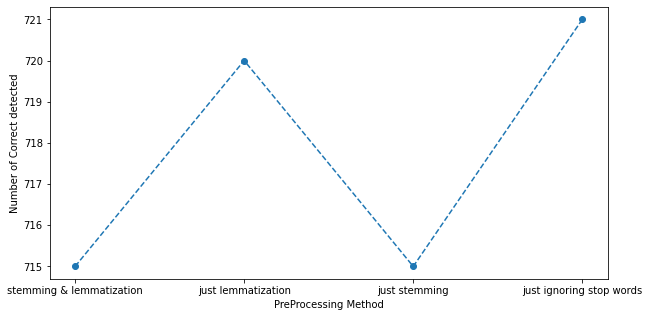

In [33]:
df = pd.read_csv('checkWithoutAdditive.csv')
y = df["correct Count"]
x = df["Unnamed: 0"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y,'--o')
mplot.xlabel("PreProcessing Method")
mplot.ylabel("Number of Correct detected")
# df.plot("Unnamed: 0", "correct Count" )

<div style="direction:rtl">
    بنابراین در این شرایط حالتی که تنها کلمات پرتکرار حذف شوند بیشترین داده را صحیح تشخیص می دهد. 
    </div>

### <div style="direction:rtl">Additive Smoothing</div>
<div style="direction:rtl">
<b>
3)  &ensp; با درنظر داشتن naive bayes توضیح دهید چرا اتفاق توضیح داده شده در صورت پروژه رخ می دهد. 
    </b><br><br>
   همانطور که در روش محاسبه احتمال در بالا توضیح داده شد احتمال کلاس c به شرط عبارت x برابر با حاصل ضرب احتمال توکن های آن عبارت به شرط کلاس c در هم و در نهایت در احتمال کلاس c است. حال فرض کنیم یک توکنی باشد که در کلاس c هیچ وقت در داده های train دیده نشده باشد پس طبق محاسبات بالا احتمال توکن x به شرط آن کلاس صفر می شود. یعنی یکی از عبارات درون ضرب صفر می شود پس کل احتمال کلاس c به شرط آن کلاس صفر می شود و دسته بند با احتمال صد در صد عبارت را متعلق به کلاس دیگر ارزیابی می کند.<br><br>
    <b>
4)  &ensp; روش Additive Smoothing را توضیح دهید و بگویید چطور به حل این مشکل کمک می کند. 
    </b><br><br>
    این روش سعی دارد داده ها را به گونه هموار کند. بدین معنا که با افزودن یک مقداری مانند آلفا که بین صفر و یک است به تعداد داده ها احتمالی که آن داده رخ می دهد را تغییر دهیم. در اصل به صورت احتمالی که محاسبه می کنیم(تعداد داده ها در آن کلاس) آلفا را اضافه می کنیم. سپس به ازای هر داده آلفا تا داده جدید به مخرج که تعداد کل داده ها در آن کلاس است می افزاییم. آلفا یک هایپرپارامتر است که اکثراً زیر یک در نظر گرفته میشود. اینجا آلفا نیم است.<br> کمکی که این روش به ما در راستای مشکل بالا می کند این است که با داده ای که احتمال صفر داشته است احتمال بسیار کمی را می افزاید تا نه با بزرگ در نظر گرفتن احتمال دسته بندی را بسیار جهت گیرانه و غیر واقعی کنیم و همچنین به کل آن عبارت شانسی بدهد که احتمالش محاسبه و بررسی شود و احتمال قطعی صفر نشود. 
</div>

In [34]:
#probability; alpha = 0.5(with Additive Smoothing)
pWordAS = calculateProbability(processTiReTr, processCoReTr, processTiNoTr, processCoNoTr, countDict, 0.5)
pWordAS['کمکم']

[1.7271256599059293e-05, 6.320513225673925e-06]

In [35]:
#With Pish/ With Additive 
outputAS = validate(testData["title"], testData["comment"], testData["recommend"], pRecom, pNotRecom, pWordAS)
# resultToCheckAS.append(outputAS[0])
# resultToCheckAS 
correctAS = outputAS[0]
allReAS = outputAS[1]
correctReAS = outputAS[2]
wrong = outputAS[3]
same = output[4]
outputAS[0:3]

[744, 402, 373]

### <div style="direction:rtl"> مقایسه چهارحالت پیش پردازش</div>
<div style="direction:rtl">
    همانطور که در پایان بخش پیش پردازش گفتیم چهار حالت مختلف پیش پردازش را تست کردیم. برای مثال در این بخش چهار بار تست کردیم و مقدار عبارات تشخیصی صحیح را در یک لیست ذخیره کردیم و سپس این عبارات را به یک دیتافریم تبدیل کردیم و آن را در یک csv ذخیره کردیم. فایل csv کنار پروژه موجود است. اما مقادیر آن در زیر قابل مشاهده است. 
    </div>

In [36]:
# df1 = pd.DataFrame(resultToCheckAS, index =["stemming & lemmatization", "just lemmatization", "just stemming", "just ignoring stop words"], columns =["correct Count"])
# df1.to_csv('checkWithAdditive.csv')
# df1

In [37]:
df1 = pd.read_csv('checkWithAdditive.csv')
df1

,Unnamed: 0,correct Count
0,stemming & lemmatization,747
1,just lemmatization,740
2,just stemming,743
3,just ignoring stop words,748


Text(0, 0.5, 'Number of Correct detected')

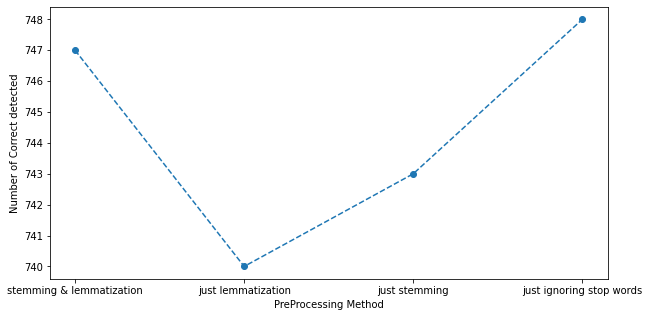

In [38]:
df1 = pd.read_csv('checkWithAdditive.csv')
y = df1["correct Count"]
x = df1["Unnamed: 0"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y,'--o')
mplot.xlabel("PreProcessing Method")
mplot.ylabel("Number of Correct detected")
# df1.plot()

<div style="direction:rtl">
    بنابراین در این شرایط حالتی که تنها کلمات پرتکرار حذف شوند بیشترین داده را صحیح تشخیص می دهد. 
    </div>

### <div style="direction:rtl"> بدون پیش پردازش</div>
    
   <div style="direction:rtl">
   در قسمت های بعد برای ارزیابی دقیق تر حالات مختلف، یکی از حالاتی که باید بررسی شود این است که داده پیش پردازشی نداشته باشد. بدین جهت ما روی داده هیچ تفاوتی ایجاد نمی کنیم و تنها آن را توکن بندی مب کنیم تا احتمالات را بتوان محاسبه کرد. نه normalization و نه حذف کلمات پرتکرار را دیگر انجام نمی دهیم.<br>
   این قسمت تا شروع فاز سوم یعنی همان ارزیابی تنها تکرار مراحل فوق اما با داده ها و ستون های تنها توکن بندی شده و بدون پیش پردازش. 
    </div>

In [39]:
#Just Tokenize
def token(column):
    result = []
    for string in column:
#         string = normalizer.normalize(string)
        for token in word_tokenize(string):
            result.append(token)
    return result

In [40]:
#Title/Recom/Train
TiReTr = token(recomTrainData["title"])
TiReTr[0:5]

['بسیار', 'عالی', 'قیمت', 'بالا', 'جای']

In [41]:
#Comment/Recom/Train
CoReTr = token(recomTrainData["comment"])
CoReTr[0:5]

['بسیار', 'عالی', 'خوب', 'و', 'تاثیر']

In [42]:
#Title/NotRecom/Train
TiNoTr = token(notRecomTrainData["title"])
TiNoTr[0:5]

['زیبا', 'اما', 'کم', 'دوام', 'سلام']

In [43]:
#Comment/NotRecom/Train
CoNoTr = token(notRecomTrainData["comment"])
CoNoTr[0:5]

['با', 'وجود', 'سابقه', 'خوبی', 'که']

In [44]:
testData1 = pd.read_csv("comment_test.csv")
testData1

,title,comment,recommend
0,وری گود,تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,زیاد مناسب نیست رنگ پس میده یه وقتایی موقع نوشتن,با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,پنکه گوشی,خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,دستگاه خیلی ضعیف,من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,عالی و بیست,بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended
...,...,...,...
795,بسیار کوچیک,طراحیش قشنگه ولی داخل عکس خیلی بزرگتر ب چشم م...,not_recommended
796,لامپ چینی,این لامپ چینی هستتش کیفیت پایین . نور کم و فاق...,not_recommended
797,خوب بود,در کل از این خریدم راضی هستم و به تناسب قیمتش ...,recommended
798,کیفیت خوبی داره,تازع نصبش کردم-سرعت انتقال و نصب بازی روش عالی...,recommended


In [45]:
#Title/Test
testTitles1 = testData1["title"]
size = testData1.shape[0]
for i in range(size):
    tokenizedTitle = []
    for token in word_tokenize(testTitles1[i]):
        tokenizedTitle.append(token)
    testTitles1[i] = tokenizedTitle
# print(testTitles[2])
testData1.head()

,title,comment,recommend
0,"[وری, گود]",تازه خریدم یه مدت کار بکنه مشخص میشه کیفیت قطعاتش,recommended
1,"[زیاد, مناسب, نیست, رنگ, پس, میده, یه, وقتایی,...",با این قیمت گزینه های بهتری هم میشه گرفت.\r\nر...,not_recommended
2,"[پنکه, گوشی]",خیلی عالیه، فقط کاش از اون سمتش میشد به پاوربا...,recommended
3,"[دستگاه, خیلی, ضعیف]",من این فیس براس چند روز یپش به دستم رسید و الا...,not_recommended
4,"[عالی, و, بیست]",بنده یه هارد اکسترنال دارم که کابل فابریکش سال...,recommended


In [46]:
#Comment/Test
testComments1 = testData1["comment"]
for i in range(size):
    tokenizedComment = []
#     string = normalizer.normalize(testComments[i])
    for token in word_tokenize(testComments1[i]):
        tokenizedComment.append(token)
    testComments1[i] = tokenizedComment
testData1.head()

,title,comment,recommend
0,"[وری, گود]","[تازه, خریدم, یه, مدت, کار, بکنه, مشخص, میشه, ...",recommended
1,"[زیاد, مناسب, نیست, رنگ, پس, میده, یه, وقتایی,...","[با, این, قیمت, گزینه, های, بهتری, هم, میشه, گ...",not_recommended
2,"[پنکه, گوشی]","[خیلی, عالیه, ،, فقط, کاش, از, اون, سمتش, میشد...",recommended
3,"[دستگاه, خیلی, ضعیف]","[من, این, فیس, براس, چند, روز, یپش, به, دستم, ...",not_recommended
4,"[عالی, و, بیست]","[بنده, یه, هارد, اکسترنال, دارم, که, کابل, فاب...",recommended


In [47]:
#Data Count/Without Preprocessing
countDict1 = countWords(TiReTr, CoReTr, TiNoTr, CoNoTr)
countDict1['بسیار']

[629, 488]

In [48]:
#probability; alpha = 0(without Additive Smoothing)
pWord1 = calculateProbability(TiReTr, CoReTr, TiNoTr, CoNoTr, countDict1, 0)
pWord1['خداوکیلی']

[1.5306083402848462e-05, 0.0]

In [49]:
#Without Pish/ Without Additive 
output1 = validate(testData1["title"], testData1["comment"], testData1["recommend"], pRecom, pNotRecom, pWord1)
correct1 = output1[0]
allRe1 = output1[1]
correctRe1 = output1[2]
output1[0:3]

[708, 402, 355]

In [50]:
#probability; alpha = 0.5(with Additive Smoothing)
pWordAS1 = calculateProbability(TiReTr, CoReTr, TiNoTr, CoNoTr, countDict1, 0.5)
pWordAS1['خداوکیلی']

[1.7923780914041132e-05, 3.971863320239424e-06]

In [51]:
#Without Pish/ With Additive 
outputAS1 = validate(testData1["title"], testData1["comment"], testData1["recommend"], pRecom, pNotRecom, pWordAS1)
correctAS1 = outputAS1[0]
allReAS1 = outputAS1[1]
correctReAS1 = outputAS1[2]
outputAS1[0:3]

[723, 401, 362]

In [52]:
#Part 3; Evaluation

## <div style="direction:rtl">فاز سوم: ارزیابی <div/>
<div style="direction:rtl">
    حال برای دسته بندی هایی که در بالا انحام دادیم بایستی معیار هایی برای ارزیابی طراحی کنیم. در اینجا 4 معیار تعریف می کنیم. 
    </div>

<div style="direction:rtl">
    1. Accuracy:<br>
   accuracy معیاری است تا در کل ببینیم در تمام داده ها چه مقدار صحیح دسته بندی شده است. 
    </div>

In [53]:
def calculateAccuracy(correct, total):
    return (correct/total)*100

<div style="direction:rtl">
    2. Precision<br>
   Precision معیاری است برای سنجش میزان دقت و صحت دسته بندی های عباراتی که در یک کلاس خاص دسته بندی شده اند(اینجا کلاس Recommended)<br>
    یعنی چقدر از داده هایی که در دسته این کلاس قرار گرفته اند واقعاً متعلق به این کلاس بوده اند. 
    </div>

In [54]:
def calculatePrecision(correctRe, allRe):
    return (correctRe/allRe)*100

<div style="direction:rtl">
    3. Recall<br>
   Recall معیاری است برای سنجش میزان دقت و صحت دسته بندی های عباراتی که در یک کلاس خاص دسته بندی شده اند در مقایسه با تمام داده ها(اینجا کلاس Recommended)<br>
    یعنی چقدر از داده هایی که متعلق به این کلاس بوده اند درست دسته بندی شده اند. 
    </div>

In [55]:
def calculateRecall(correctRe, totalRe):
    return (correctRe/totalRe)*100

<div style="direction:rtl">
    4. F1<br>
   تابعی از precision و recall است. در اصل یک مقدار متعادل میان recall و precision است. 
    </div>

In [56]:
def calculateF1(precision, recall):
    return 2*((precision*recall)/(precision+recall))

<div style="direction:rtl">
<b>
5)  &ensp; چرا مقدار Precision و Recall هر کدام به تنهایی برای ارزیابی مدل کافی نیست؟ همراه با مثال 
    </b><br><br>
 هر دو این معیار ها رو یک کلاس و دسته خاص تمرکز می کنند، حال این دو معیار را بررسی می کنیم:<br>
    - Recall <Br>
   تعریف این معیار در بالا آمده است. حال فرض کنیم در ایام کرونا بخواهیم دسته بندی طراحی کنیم و این دسته بند برای تمام افراد کرونا مثبت را پیش بینی کند. بنابراین Recall روی کلاس مثبت بسیار عدد بالایی می شود اما به هیچ عنوان این دسته بندی خوب نیست چون تعداد زیادی مثبت اشتباه دارد.<br>
    -Precision<br>
    تعریف این معیار هم در بالا آمده است. حال فرض کنیم همان دسته بند مثال بالا یعنی برای بیماری کرونا را به گونه ای عمل کند که تنها یک نفر که واقعاً کرونا دارد مثبت تشخیص دهد. اینجا Precision صد در صد می شود اما این دسته بندی هم خوب نیست چون تعدا زیادی مثبت را در نظز نمیگیرد.
    <br><br>
    <b>
6)  &ensp; معیار F1 از چه نوع میانگین گیری بین precision و recall استفاده می کند؟ علت آن به نظر شما چیست؟ 
    </b><br><br>
  برای محاسبه F1 ما از میانگین <b>هارمونیک</b> معیار های precision و recall استفاده می کنیم. این میانگین حاصل تقسیم 2 بر مجموع معکوس این دو معیار است. این میانگین گیری تفاوتش با میانگین گیری عادی این است که به اعداد نسبتی داده می شود. همانطور که در سوال بالا گفته شد بالا بودن این دو معیار الزاماً خوب نیست بنابراین به مقدار متعادل شده این دو نیازمندیم.F1 همین مقدار متعادل را ایجاد می کند فقط مقدار حاصل به سمت مقدار کمتر جهت میگیرد. 
</div>

<div style="direction:rtl">
   حال برای چهار حالت زیر مقادیر چهار معیار ذکر شده را با کمک اطلاعاتی که از مراحل قبل به دست آورده ایم حساب می کنیم.<br>
    a) استفاده از پیش پردازش داده ها و Additive Smoothing
   <br> 
    b) تنها استفاده از Additive Smoothing
   <br> 
    c) تنها استفاده از پیش پردازش داده ها
  <br> 
    d) استفاده نکردن از هیچ کدام از پیش پردازش داده ها و Additive Smoothing
    </div>

In [57]:
#a :: with Pish & with Additive
accuracyAS = calculateAccuracy(correctAS, testData.shape[0])
precisionAS = calculatePrecision(correctReAS, allReAS)
recallAS = calculateRecall(correctReAS, totalRecommended)
f1AS = calculateF1(precisionAS, recallAS)
[accuracyAS, precisionAS, recallAS, f1AS]

[93.0, 92.7860696517413, 93.25, 93.01745635910225]

In [58]:
#b :: without Pish & with Additive
accuracyAS1 = calculateAccuracy(correctAS1, testData.shape[0])
precisionAS1 = calculatePrecision(correctReAS1, allReAS1)
recallAS1 = calculateRecall(correctReAS1, totalRecommended)
f1AS1 = calculateF1(precisionAS1, recallAS1)
[accuracyAS1, precisionAS1, recallAS1, f1AS1]

[90.375, 90.27431421446383, 90.5, 90.38701622971286]

In [59]:
#c :: with Pish & without Additive
accuracy = calculateAccuracy(correct, testData.shape[0])
precision = calculatePrecision(correctRe, allRe)
recall = calculateRecall(correctRe, totalRecommended)
f1 = calculateF1(precision, recall)
[accuracy, precision, recall, f1]

[89.75, 88.97058823529412, 90.75, 89.85148514851485]

In [60]:
#d :: without Pish & without Additive
accuracy1 = calculateAccuracy(correct1, testData.shape[0])
precision1 = calculatePrecision(correctRe1, allRe1)
recall1 = calculateRecall(correctRe1, totalRecommended)
f11 = calculateF1(precision1, recall1)
[accuracy1, precision1, recall1, f11]

[88.5, 88.30845771144278, 88.75, 88.5286783042394]

<div style="direction:rtl">
  ابتدا برای هر کدام از چهار معیار جداگانه دیتا فریمی برای چهار حالت می سازیم و نمودار های آن ها رسم می کنیم و در نهایت چهار دیتافریم تشکیل شده را در قالب یک دیتا فریم ادغام میکنیم و به عنوان خروجی تولید نمایش می دهیم.
    </div>

In [61]:
allAccuracy = [accuracyAS, accuracyAS1, accuracy, accuracy1]
accDf = pd.DataFrame(allAccuracy, index =["a", "b", "c", "d"], columns =["Accuracy"])
accDf

,Accuracy
a,93.000
b,90.375
c,89.750
d,88.500


Text(0, 0.5, 'Accuracy')

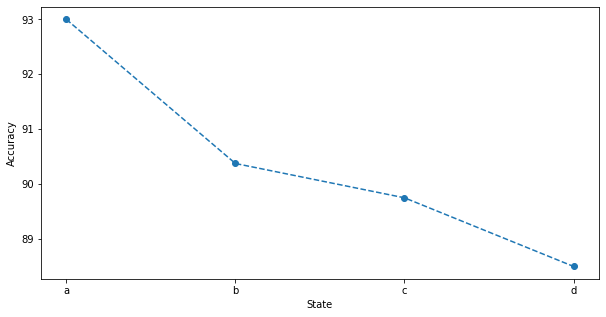

In [62]:
y = accDf["Accuracy"]
x = ["a","b","c","d"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y,'--o')
mplot.xlabel("State")
mplot.ylabel("Accuracy")
# accDf.plot()

In [63]:
allPrecision = [precisionAS, precisionAS1, precision, precision1]
prDf = pd.DataFrame(allPrecision, index =["a", "b", "c", "d"], columns =["Precision"])
prDf

,Precision
a,92.786070
b,90.274314
c,88.970588
d,88.308458


Text(0, 0.5, 'Precision')

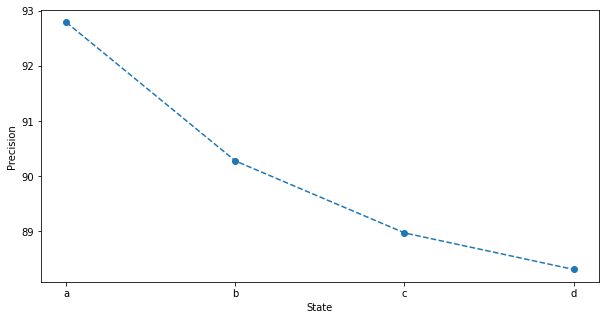

In [64]:
y = prDf["Precision"]
x = ["a","b","c","d"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y,'--o')
mplot.xlabel("State")
mplot.ylabel("Precision")
# prDf.plot()

In [65]:
allRecall = [recallAS, recallAS1, recall, recall1]
reDf = pd.DataFrame(allRecall, index =["a", "b", "c", "d"], columns =["Recall"])
reDf

,Recall
a,93.25
b,90.50
c,90.75
d,88.75


Text(0, 0.5, 'Recall')

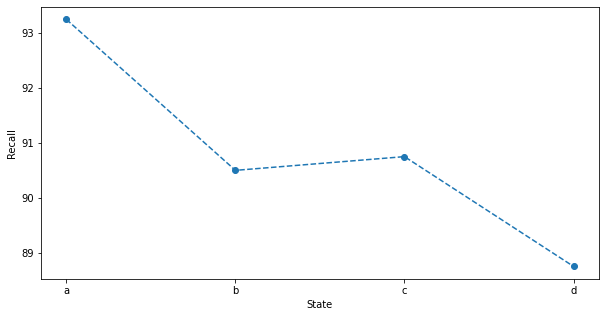

In [66]:
y = reDf["Recall"]
x = ["a","b","c","d"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y,'--o')
mplot.xlabel("State")
mplot.ylabel("Recall")
# reDf.plot()

In [67]:
allF1 = [f1AS, f1AS1, f1, f11]
f1Df = pd.DataFrame(allF1, index =["a", "b", "c", "d"], columns =["F1"])
f1Df

,F1
a,93.017456
b,90.387016
c,89.851485
d,88.528678


Text(0, 0.5, 'F1')

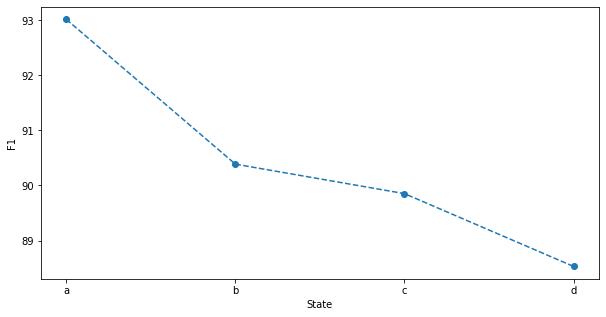

In [68]:
y = f1Df["F1"]
x = ["a","b","c","d"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y,'--o')
mplot.xlabel("State")
mplot.ylabel("F1")
# f1Df.plot()

<div style="direction:rtl">
<b>
7)  &ensp; در یک جدول، مقدار 4 معیار گفته شده را برای 4 حالت ذکر شده به دست بیاورید. 
   </b> 
</div>

In [69]:
newDf = pd.concat([accDf, prDf, reDf, f1Df], axis = 1)
newDf

,Accuracy,Precision,Recall,F1
a,93.000,92.786070,93.25,93.017456
b,90.375,90.274314,90.50,90.387016
c,89.750,88.970588,90.75,89.851485
d,88.500,88.308458,88.75,88.528678


Text(0, 0.5, 'value')

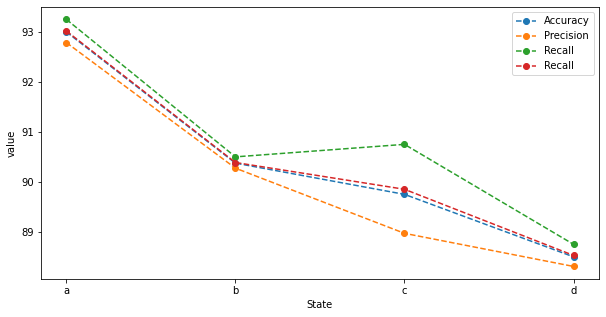

In [70]:
# newDf.plot()
x = ["a","b","c","d"]
y1 = newDf["Accuracy"]
y2 = newDf["Precision"]
y3 = newDf["Recall"]
y4 = newDf["F1"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y1,'--o')
mplot.plot(x,y2,'--o')
mplot.plot(x,y3,'--o')
mplot.plot(x,y4,'--o')
mplot.legend(["Accuracy","Precision","Recall","Recall"])
mplot.xlabel("State")
mplot.ylabel("value")

<div style="direction:rtl">
<b>
8)  &ensp; مقادیر به دست آمده در بخش قبل را تحلیل کنید. 
   </b><br><br>
       در حالت a داده های اضافی حذف شده اند و داده ها تمیز شده اند همچنین تنها بنا به داده ای تست و نبودن یک توکن در کلاسی خاص جهت گیری انجام نشده و به آن توکن هم شانس کمی در آن کلاس داده شده است اینها مواردی هستند که دسته بند و مدل naive bayes مان دقیق تر تصمیم بگیرد که باعث در هر چهار معیار برترین حالت باشد. اختلاف حالات b و c زیاد نیست چون هردو تلاشی برای دقیق تر شدن تصمیم گیری کرده اند اما در حالتی که Additive Smoothing نداریم جهت گیری ناخودآگاه و ناگهانی به سمت یک کلاس دقت مدل را کم کرده است. در حالت آخر که هم جهت گیری داریم و هم تعداد زیادی داده اضافی و پردازش نشده داریم دقت بسیار پایین می آید.
       <br>همچنین نمودار نشان می دهد اکثر تعداد عباراتی که recommended پیشنهاد شده اند به واقع recommended بودند. علاوه بر آن موردی که در سوال 6 بیان شد اینجا دیده می شود معیار F1 میانگین دو معیار Recall و Precission است. همچنین نزدیکی دو معیار Accuracy و F1 نشان می دهد این دو معیار، معیار های متعادل و خوبی برای سنجش دقت مدل هستند.
</div>

<div style="direction:rtl">
<b>
9)  &ensp; پنج مورد از کامنت هایی که در داده تست هستند و مدل آنها را به اشتباه تشخیص داده است. علت این اشتباهات به نظر شما چیست؟ 
   </b>
</div>

In [91]:
testData = pd.read_csv("comment_test.csv")
for i in wrong[0:5]:
    display(testData.iloc[i])

title                                           نقد پس از خرید
comment      سلام ، راحت شدم از کابل شارژ ، توصیه میشود به ...
recommend                                          recommended
Name: 8, dtype: object

title                                            خیالم راحت شد
comment      فندک قبلیم مدام فیوز میسوزوند و یک بار شارژر م...
recommend                                          recommended
Name: 19, dtype: object

title                                             جنس و زیبایی
comment      زیبا هستش از مدل های دیگه مثل پارس ... بنظرم ز...
recommend                                          recommended
Name: 56, dtype: object

title                                        بررسی فیلتر سرکان
comment      من خودم جزو افرادی بودم که نزدیک سیزده ساله از...
recommend                                      not_recommended
Name: 69, dtype: object

title        انقدر که در تصویر دیده می شود زیبا نیست
comment                      اگر خریداری نکنید بهتره
recommend                            not_recommended
Name: 101, dtype: object

<div style="direction:rtl">
دلایل گوناگونی می تواند باعث این اشکالات شوند:<br>
    - ما لغات پرتکرار زبان فارسی را حذف کردیم اما الان داریم در داده های مرتبط با یک سایت خرید و فروش کار می کنیم. خود این داده ها می توانند دفعات زیادی در عبارات تکرار شوند؛ مثلاً همه درباره یک نوع مداد، شارژر و ... نظر می دهند. حذف نکردن این موارد باعث خطا در سنجش احتمال می شود.<br>
    - ممکن است در هنگامی که میگوییم با احتمالات برابر با شانس پنجاه پنجاه یکی را انتخاب کن این تصادفی ما را به صورت تصادفی به دسته نادرست فرستاده باشد.<br>
    - ممکن است لغاتی را جزو لغات پرتکرار قرار داده ایم که نباید حذف می شد و اگر حذف نمیشد احتمالات دقیق تر میبودند.<br>
    - آلفایی که در Additive Smoothing انتخاب کردیم مناسب نبوده است و باعث خوشبینانه تر کردن یه سری احتمالات شده است.
</div>

### <div style="direction:rtl"> مقایسه دو حالت پیش پردازش</div>
<div style="direction:rtl">
    همانطور که در پایان بخش پیش پردازش گفتیم چهار حالت مختلف پیش پردازش را تست کردیم. برای مثال در این بخش را برای دو حالت بدون دو عملیات stem و lemmatization و همراه با این دو تست کردیم و  مقادیر چهر معیار را در یک لیست ذخیره کردیم و سپس این عبارات را به یک دیتافریم تبدیل کردیم و آن را در یک csv ذخیره کردیم. فایل csv کنار پروژه موجود است. اما مقادیر آن در زیر قابل مشاهده است. 
    </div>

In [71]:
# allDf = pd.concat([accDf, prDf, reDf, f1Df], axis = 1)
# allDf.to_csv('allDf.csv')
# allDf

In [72]:
# allDfSL = pd.concat([accDf, prDf, reDf, f1Df], axis = 1)
# allDfSL.to_csv('allDfSL.csv')
# allDfSL

In [73]:
allDf = pd.read_csv('allDf.csv')
allDf

,Unnamed: 0,Accuracy,Precision,Recall,F1
0,a,93.500,93.283582,93.75,93.516209
1,b,90.875,90.773067,91.00,90.886392
2,c,90.125,89.826303,90.50,90.161893
3,d,88.000,87.438424,88.75,88.089330


Text(0, 0.5, 'value')

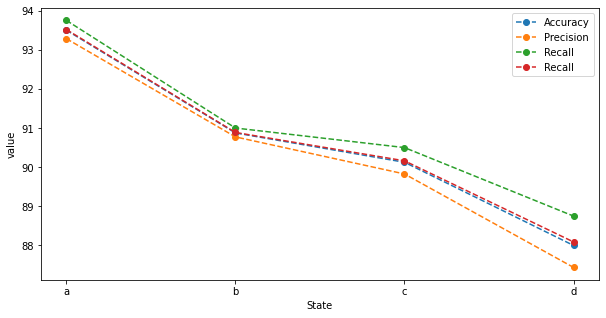

In [74]:
allDf = pd.read_csv('allDf.csv')
x = allDf["Unnamed: 0"]
y1 = allDf["Accuracy"]
y2 = allDf["Precision"]
y3 = allDf["Recall"]
y4 = allDf["F1"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y1,'--o')
mplot.plot(x,y2,'--o')
mplot.plot(x,y3,'--o')
mplot.plot(x,y4,'--o')
mplot.legend(["Accuracy","Precision","Recall","Recall"])
mplot.xlabel("State")
mplot.ylabel("value")
# allDf.plot()

In [75]:
allDfSL = pd.read_csv('allDfSL.csv')
allDfSL

,Unnamed: 0,Accuracy,Precision,Recall,F1
0,a,93.125,92.803970,93.50,93.150685
1,b,90.875,90.570720,91.25,90.909091
2,c,89.250,89.054726,89.50,89.276808
3,d,88.375,87.714988,89.25,88.475836


Text(0, 0.5, 'value')

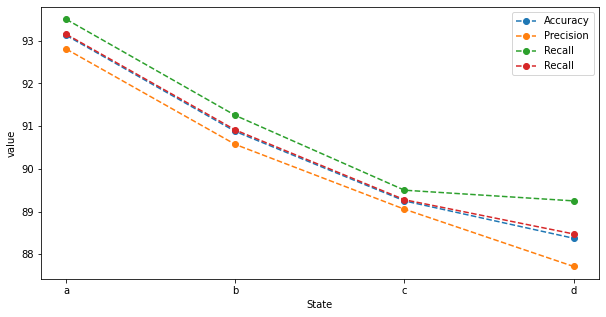

In [76]:
allDfSL = pd.read_csv('allDfSL.csv')
x = allDfSL["Unnamed: 0"]
y1 = allDfSL["Accuracy"]
y2 = allDfSL["Precision"]
y3 = allDfSL["Recall"]
y4 = allDfSL["F1"]
mplot.figure(figsize=(10,5))
mplot.plot(x,y1,'--o')
mplot.plot(x,y2,'--o')
mplot.plot(x,y3,'--o')
mplot.plot(x,y4,'--o')
mplot.legend(["Accuracy","Precision","Recall","Recall"])
mplot.xlabel("State")
mplot.ylabel("value")
# allDfSL.plot()

<div style="direction:rtl">
    بنابراین در این شرایط حالتی که تنها کلمات پرتکرار حذف شوند در چهار حالت برای معیار ها مقادیر به نسبه بهتری را گزارش می دهند. البته در همه موارد ذکر شده تفاوت بسیار کم است. 
    </div>

## <div style="direction:rtl"> نتیجه گیری</div>
<div style="direction:rtl">
    یکی از راه های دسته بندی داده ها به کلاس های متفاوت کمک گرفتن از Naive Bayse است. اما تنها استفاده از آن ضامن دسته بندی دقیق نیست. توجه به پیش پردازش داده ها، تمیز کردن آنها و آماده سازی آنها برای استفاده در مدل از اهمیت بالایی برخوردار است. همچنین باید توجه کرد داده هایی که به عنوان train در اختیار داریم الزاماً احتمالات دقیق نمی دهند(اکثراً نمی دهند) و بایستی با کمک راههایی مانند Additive Smoothing احتمالات را دقیق تر کنیم. همچنین تنها به یک معیار برای تحلیل دسته بندی مان بسنده نکنیم و با معیار های گوناگون و ترکیب آنها دسته بندی مان را بسنجیم. 
    </div>